# Binarization of a lattice 

In [29]:
# Path to tbs

import sys
import os

sys.path.append(os.path.dirname('../'))

In [30]:
# imports
from tbs.dismantlable import random_dismantlable_lattice, draw_dismantlable_lattice_to_pyplot, DismantlableLattice

## Creation of a random totally balanced lattice

In [32]:
N_ELEMENTS = 20
random_lattice = random_dismantlable_lattice(range(N_ELEMENTS))

In [33]:
import matplotlib

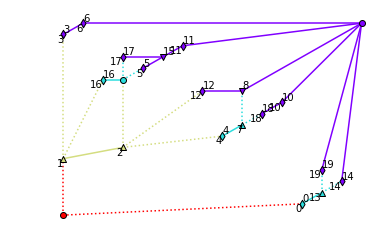

In [34]:
draw_dismantlable_lattice_to_pyplot(random_lattice, matplotlib.pyplot, matplotlib.cm.rainbow)
matplotlib.pyplot.show()

## Lattice binarization

The random lattice is not binary in principle. We want to binarize it.

In [38]:
print(random_lattice.is_binary())
random_lattice.binarize()
print(random_lattice.is_binary())

False
True


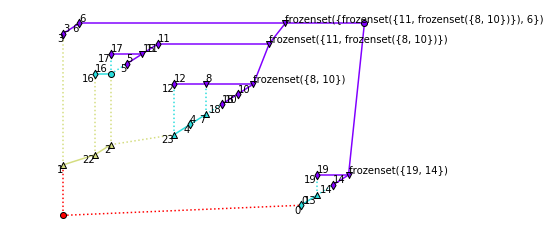

In [39]:
draw_dismantlable_lattice_to_pyplot(random_lattice, matplotlib.pyplot, matplotlib.cm.rainbow)
matplotlib.pyplot.show()

## Decomposition of a lattice

A binary lattice can be decomposed into a sequence of trees corresponding to its vertices. The initial lattice has to be atomistic to begin the process so that all objects are atoms of the lattice.

In [40]:
print(random_lattice.is_atomistic())
random_lattice.make_atomistic()
print(random_lattice.is_binary(), random_lattice.is_atomistic())

False
True True


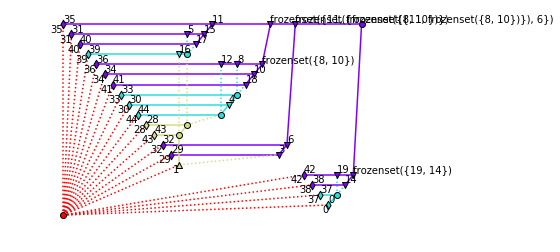

In [41]:
draw_dismantlable_lattice_to_pyplot(random_lattice, matplotlib.pyplot, matplotlib.cm.rainbow)
matplotlib.pyplot.show()

In [42]:
from tbs.dismantlable import DecompositionBTB

In [43]:
decomposition = DecompositionBTB.build_from_binary_lattice(random_lattice)

The decomposition trees are represented as follows :
    - a red edge correspond to a non constructive edge i.e one vertex is included in the other
    - a green edge is the next edge to be merged
    - a green vertex is the vertex created this step

In [44]:
from tbs.dismantlable import draw_tree_decomposition_to_pyplot

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


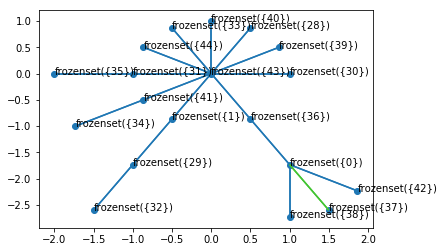

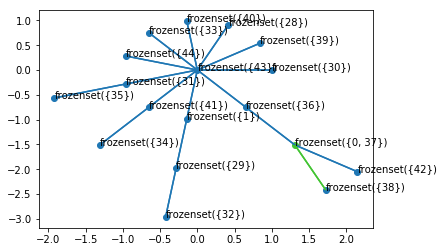

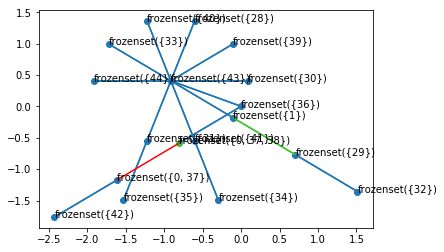

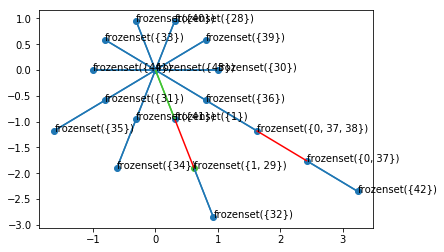

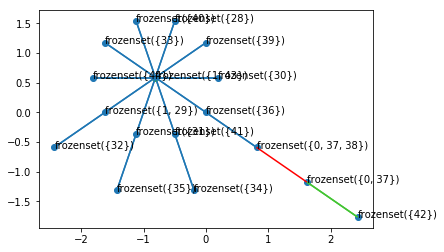

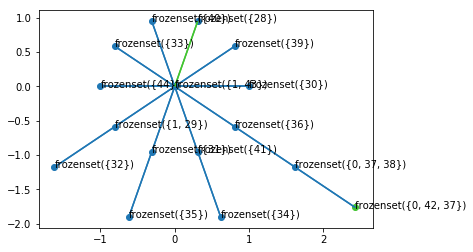

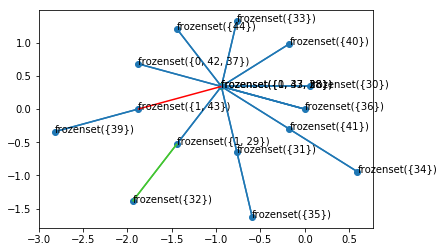

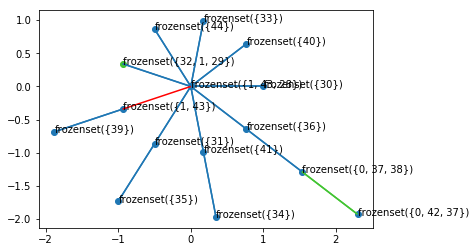

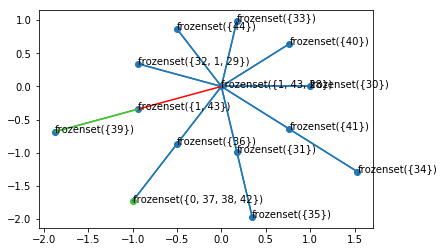

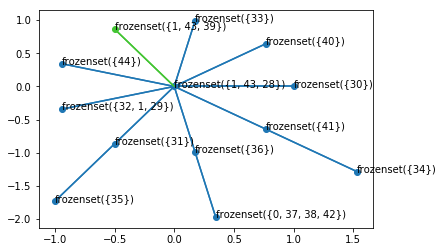

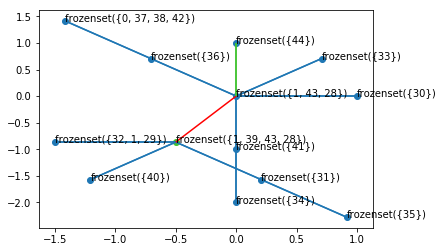

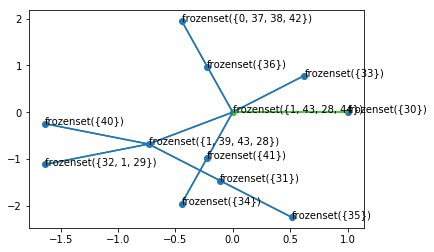

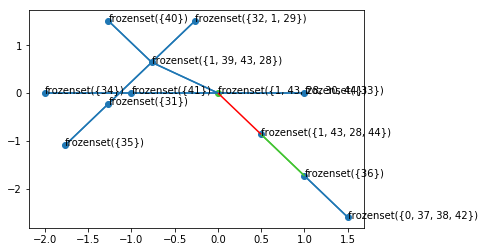

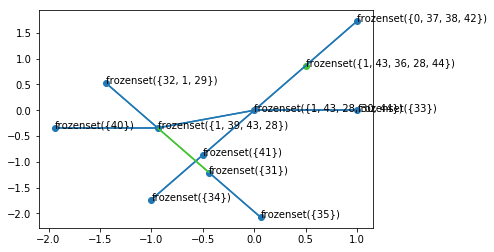

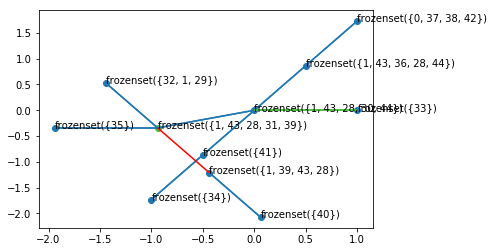

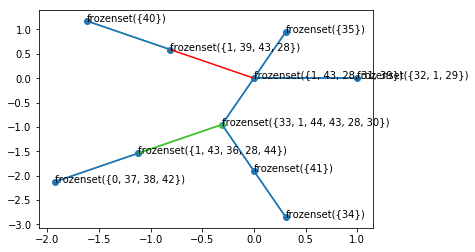

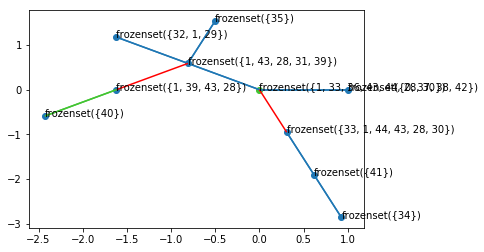

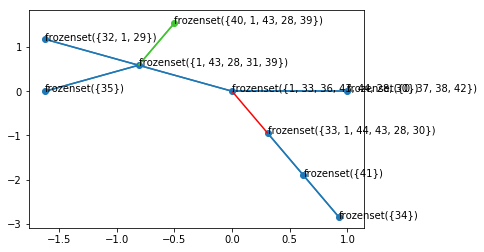

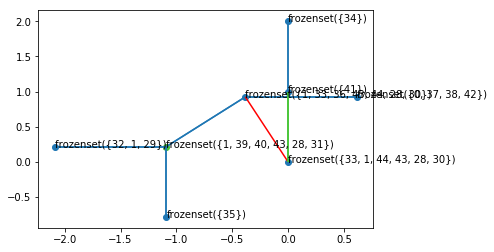

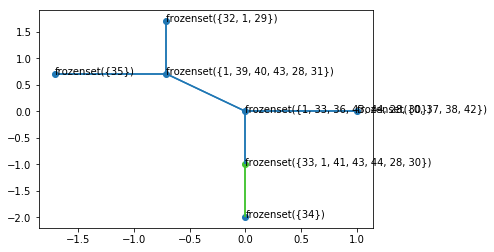

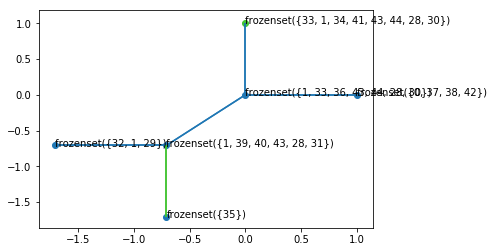

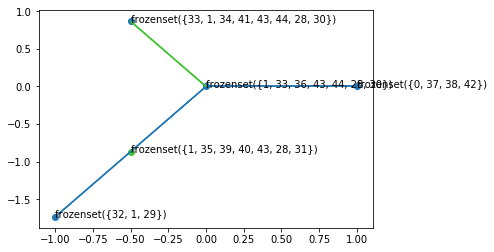

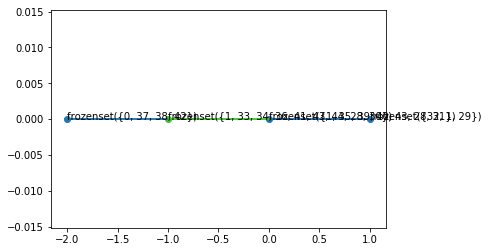

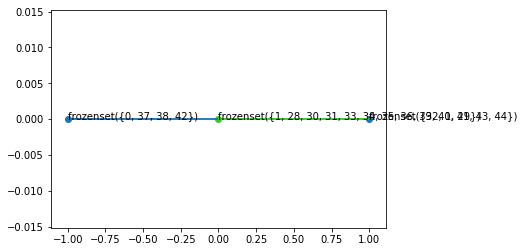

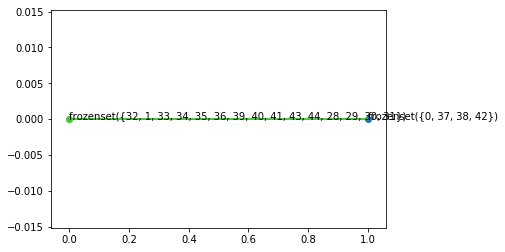

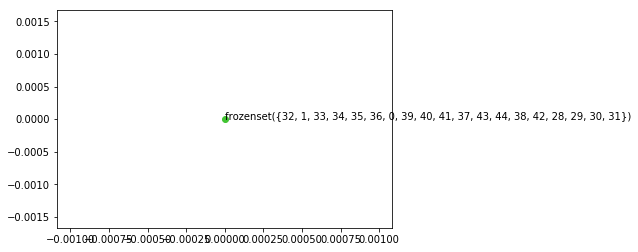

In [48]:
for i in range(len(decomposition.history)):
    draw_tree_decomposition_to_pyplot(decomposition, i, matplotlib.pyplot)
    matplotlib.pyplot.draw()

In [49]:
decomposition.order #the order edges were merged

[(frozenset({0}), frozenset({37})),
 (frozenset({0, 37}), frozenset({38})),
 (frozenset({1}), frozenset({29})),
 (frozenset({1}), frozenset({43})),
 (frozenset({42}), frozenset({0, 37})),
 (frozenset({28}), frozenset({1, 43})),
 (frozenset({32}), frozenset({1, 29})),
 (frozenset({0, 37, 42}), frozenset({0, 37, 38})),
 (frozenset({1, 43}), frozenset({39})),
 (frozenset({1, 39, 43}), frozenset({1, 28, 43})),
 (frozenset({1, 28, 43}), frozenset({44})),
 (frozenset({30}), frozenset({1, 28, 43, 44})),
 (frozenset({36}), frozenset({1, 28, 43, 44})),
 (frozenset({1, 28, 39, 43}), frozenset({31})),
 (frozenset({33}), frozenset({1, 28, 30, 43, 44})),
 (frozenset({1, 28, 36, 43, 44}), frozenset({1, 28, 30, 33, 43, 44})),
 (frozenset({40}), frozenset({1, 28, 39, 43})),
 (frozenset({1, 28, 39, 40, 43}), frozenset({1, 28, 31, 39, 43})),
 (frozenset({41}), frozenset({1, 28, 30, 33, 43, 44})),
 (frozenset({1, 28, 30, 33, 41, 43, 44}), frozenset({34})),
 (frozenset({35}), frozenset({1, 28, 31, 39, 40,

## Construction of a lattice via decomposition trees

In [50]:
# imports
from tbs.graph import random_tree

The decomposition process needs a tree to begin with.

In [51]:
TREE_SIZE = 10
random_tree = random_tree(range(TREE_SIZE))

In [52]:
decomposition = DecompositionBTB.build_from_tree(random_tree)

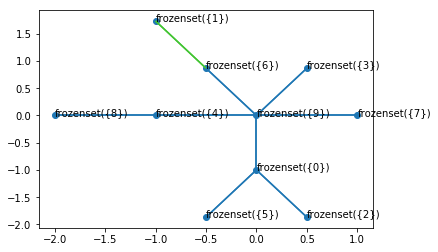

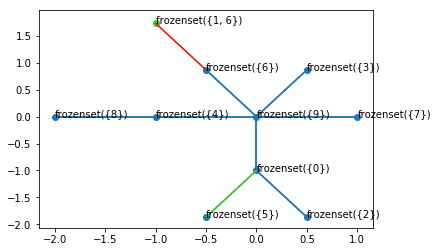

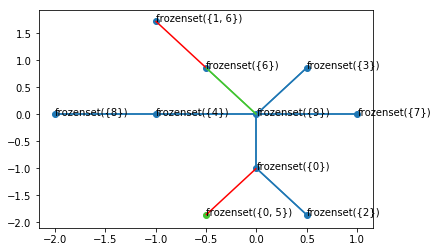

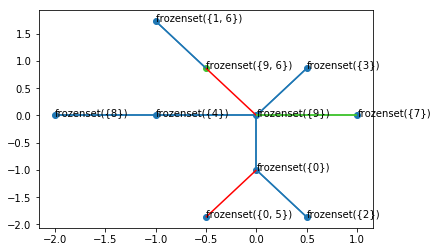

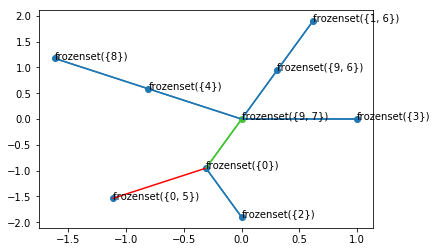

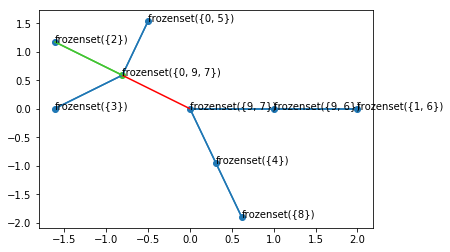

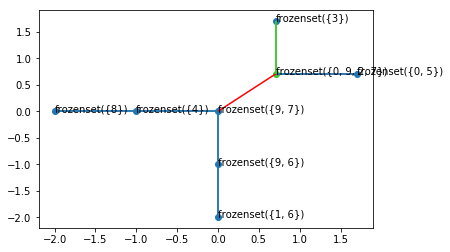

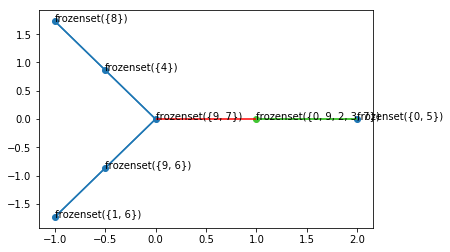

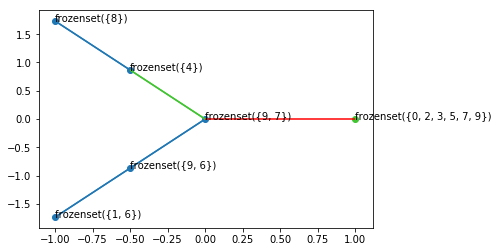

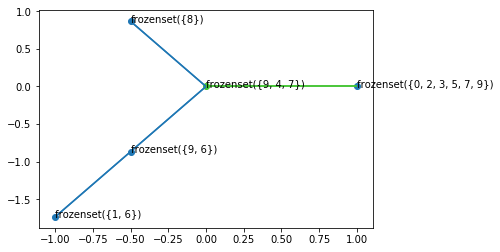

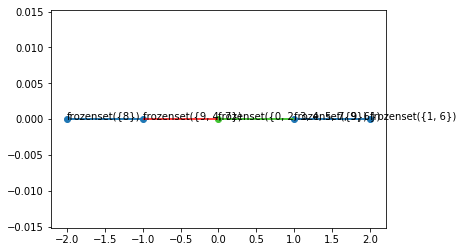

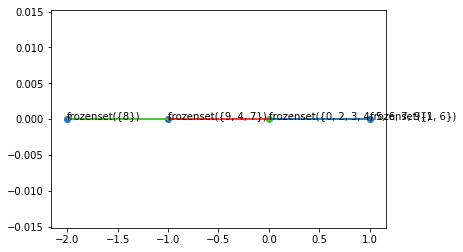

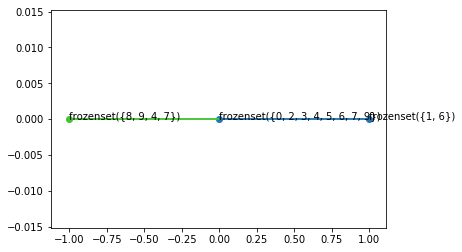

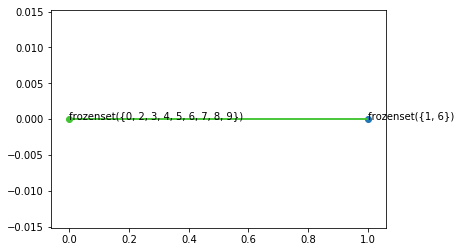

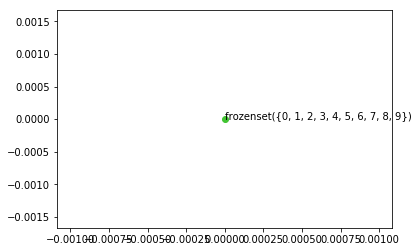

In [53]:
for i in range(len(decomposition.history)):
    draw_tree_decomposition_to_pyplot(decomposition, i, matplotlib.pyplot)
    matplotlib.pyplot.draw()

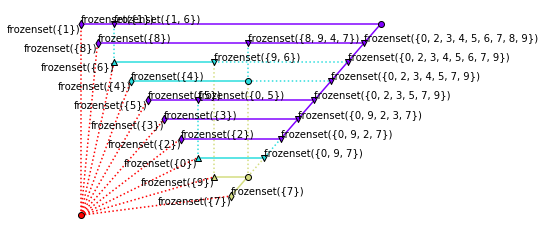

In [54]:
associated_lattice = DismantlableLattice(decomposition.hase_diagram)
draw_dismantlable_lattice_to_pyplot(associated_lattice, matplotlib.pyplot, matplotlib.cm.rainbow)

In [55]:
print(associated_lattice.is_binary())

True


In [56]:
decomposition.order

[(frozenset({6}), frozenset({1})),
 (frozenset({5}), frozenset({0})),
 (frozenset({6}), frozenset({9})),
 (frozenset({7}), frozenset({9})),
 (frozenset({7, 9}), frozenset({0})),
 (frozenset({0, 7, 9}), frozenset({2})),
 (frozenset({0, 2, 7, 9}), frozenset({3})),
 (frozenset({0, 2, 3, 7, 9}), frozenset({0, 5})),
 (frozenset({4}), frozenset({7, 9})),
 (frozenset({0, 2, 3, 5, 7, 9}), frozenset({4, 7, 9})),
 (frozenset({0, 2, 3, 4, 5, 7, 9}), frozenset({6, 9})),
 (frozenset({4, 7, 9}), frozenset({8})),
 (frozenset({0, 2, 3, 4, 5, 6, 7, 9}), frozenset({4, 7, 8, 9})),
 (frozenset({1, 6}), frozenset({0, 2, 3, 4, 5, 6, 7, 8, 9}))]